<a href="https://colab.research.google.com/github/JagtapMayuri29/Electric-Vehicle-EDA/blob/main/Electric_Vehicle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


## **Loading the data into the data frame.**

In [ ]:
df = pd.read_csv("/content/dataset_1.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.shape

(112634, 17)

##**Fixing all columns**##

In [ ]:
#Displaying Columns name
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
#Renaming Country
df = df.rename(columns={"County":"Country"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   Country                                            112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
#Checking Missing values
df.isna().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
#removing missing values
df = df.dropna()
df.count()

,0
VIN (1-10),112152
Country,112152
City,112152
State,112152
Postal Code,112152
Model Year,112152
Make,112152
Model,112152
Electric Vehicle Type,112152
Clean Alternative Fuel Vehicle (CAFV) Eligibility,112152


In [ ]:
df.isna().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.shape

(112152, 17)

## **Univarite Analysis** ##


In [ ]:
#Categorical And Numerical Columns
cat_df =df.select_dtypes(include = ['object'])
num_df =df.select_dtypes(include = ['int64','float64'])

In [ ]:
cat_df.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
num_df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

### **Detecting outliers using Boxplot**

Postal Code
Skew : 1.83


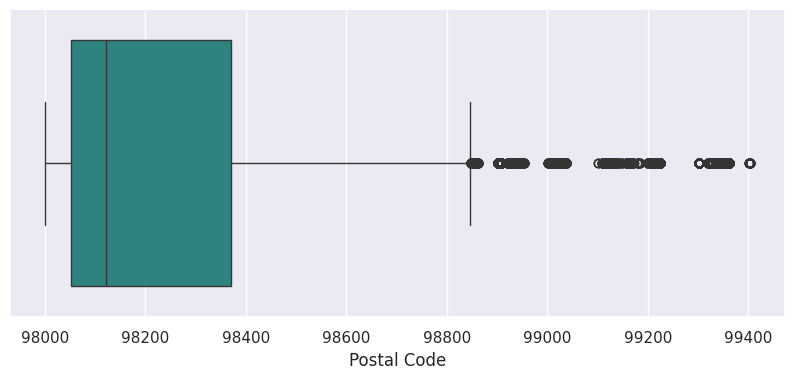

Model Year
Skew : -0.82


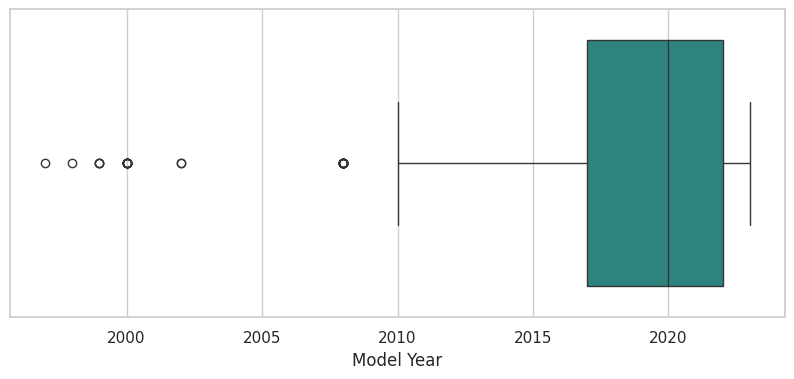

Electric Range
Skew : 0.82


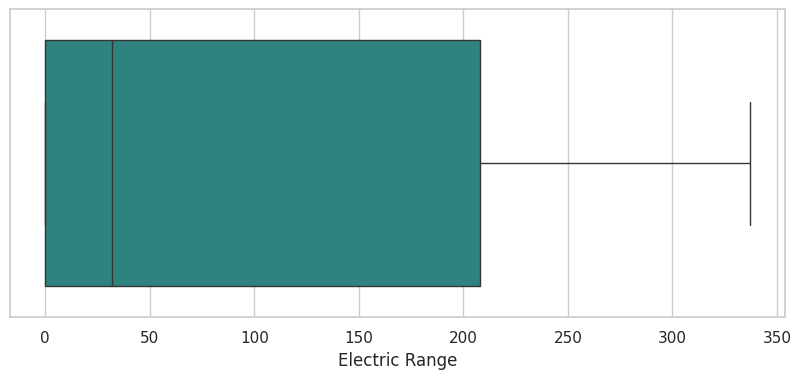

Base MSRP
Skew : 10.11


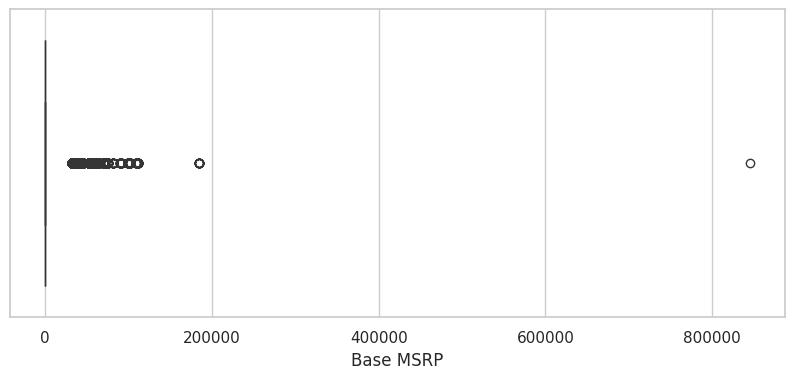

Legislative District
Skew : -0.54


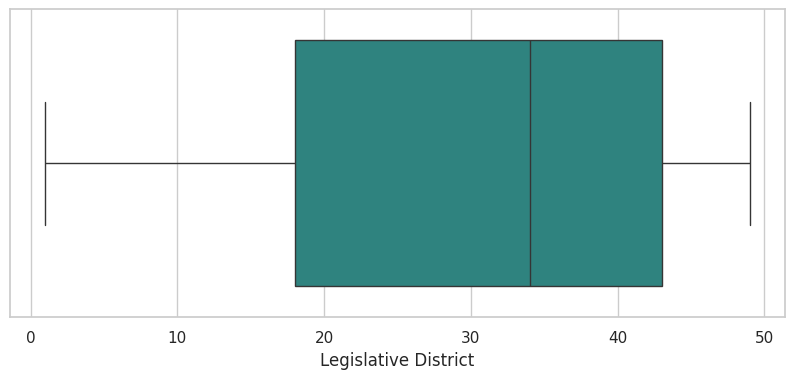

DOL Vehicle ID
Skew : 1.15


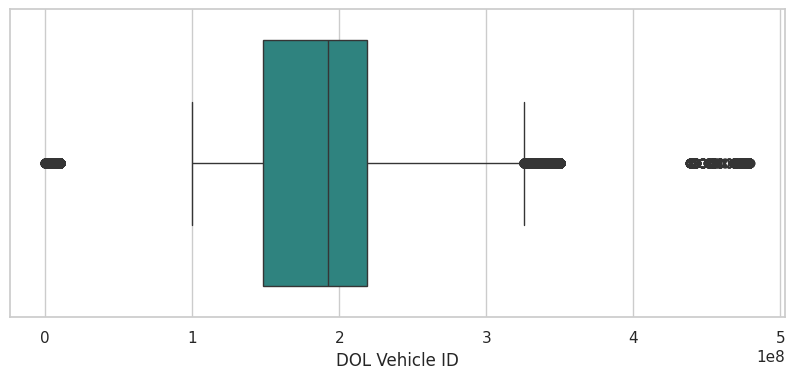

2020 Census Tract
Skew : 0.31


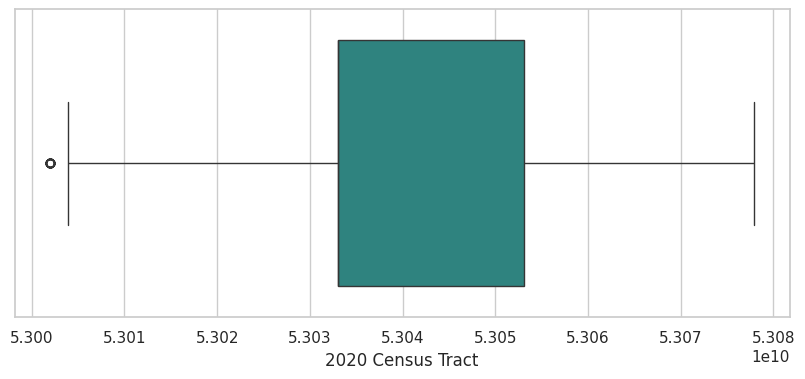

In [ ]:
for col in num_df.columns:
  print(col)
  print('Skew :', round(df[col].skew(), 2))
  plt.figure(figsize = (10,4))
  sns.boxplot(x=df[col],palette="viridis")
  sns.set_style("whitegrid")
  plt.show()

In [ ]:
df.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### **Distribution of Model Year**

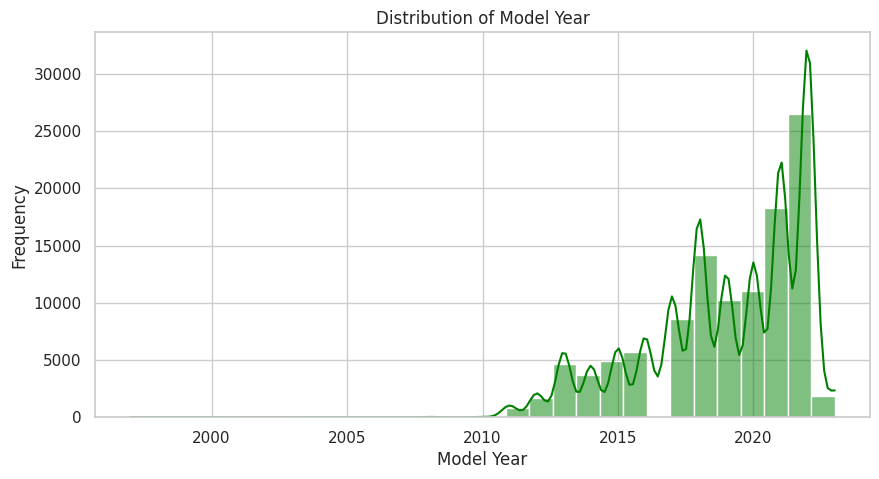

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Model Year'],kde=True, bins=30,color="Green")
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

### **Distribution of Electric Range** ##

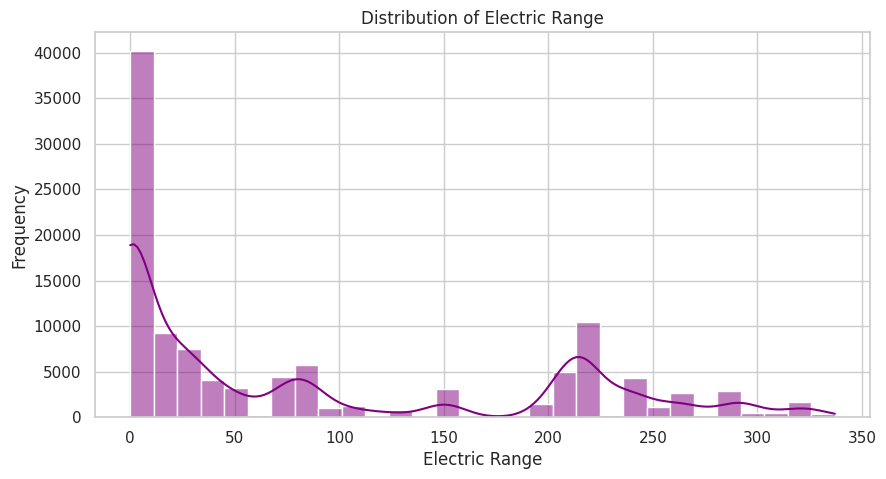

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'], kde=True, bins=30,color="Purple")
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

### **Distribution of 2020 Census Tract**

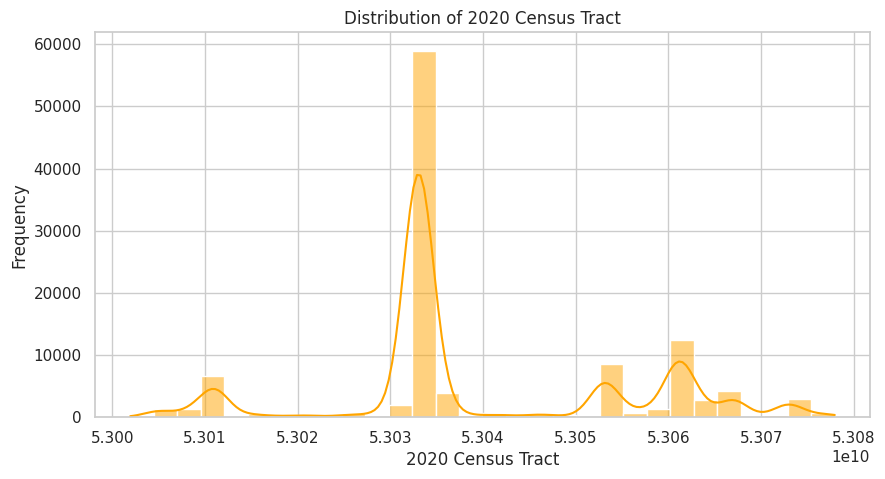

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['2020 Census Tract'], kde=True, bins=30,color="Orange")
plt.title('Distribution of 2020 Census Tract')
plt.xlabel('2020 Census Tract')
plt.ylabel('Frequency')
plt.show()

### **Distribution of Categorical Column**

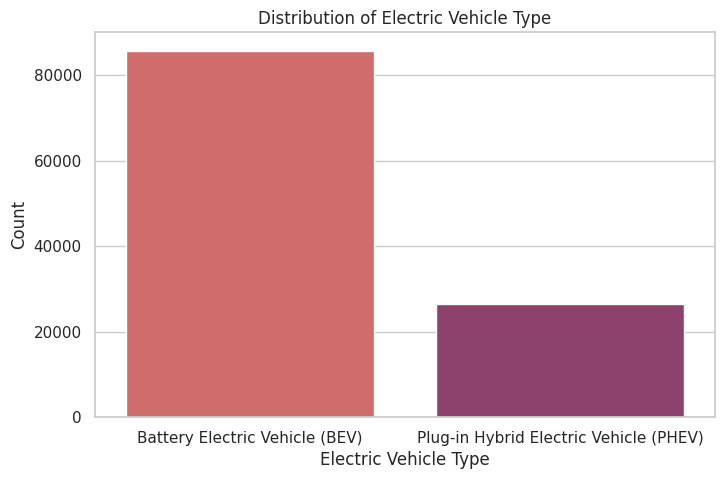

In [ ]:
#Distribution of Categorical columns of Electric Vehicle type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Electric Vehicle Type', palette="flare")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()

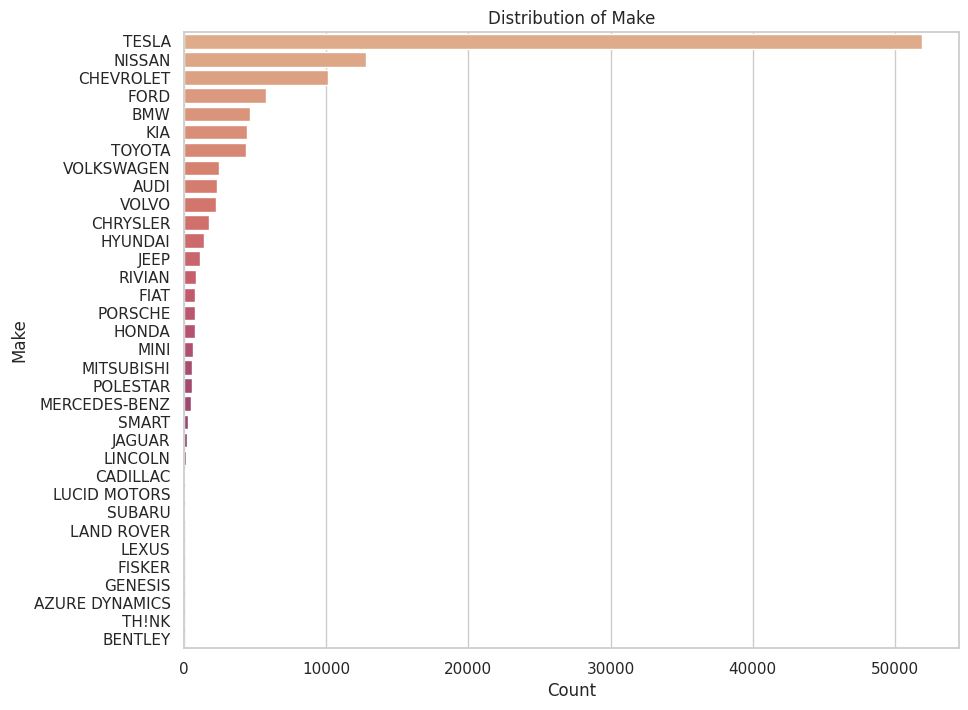

In [ ]:
#Distribution of Make
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().index, palette="flare")
plt.title('Distribution of Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()


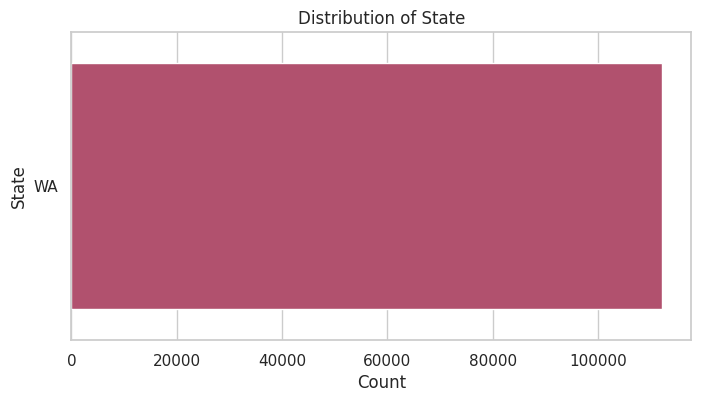

In [ ]:
#Distribution of State
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='State', order=df['State'].value_counts().index, palette="flare")
plt.title('Distribution of State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


In [ ]:
#Distribution of City
by_city = df.City.value_counts()
top_10_city = by_city[:10]
top_10_city

,count
City,
Seattle,20295
Bellevue,5919
Redmond,4199
Vancouver,4013
Kirkland,3598
Bothell,3334
Sammamish,3291
Renton,2777
Olympia,2729


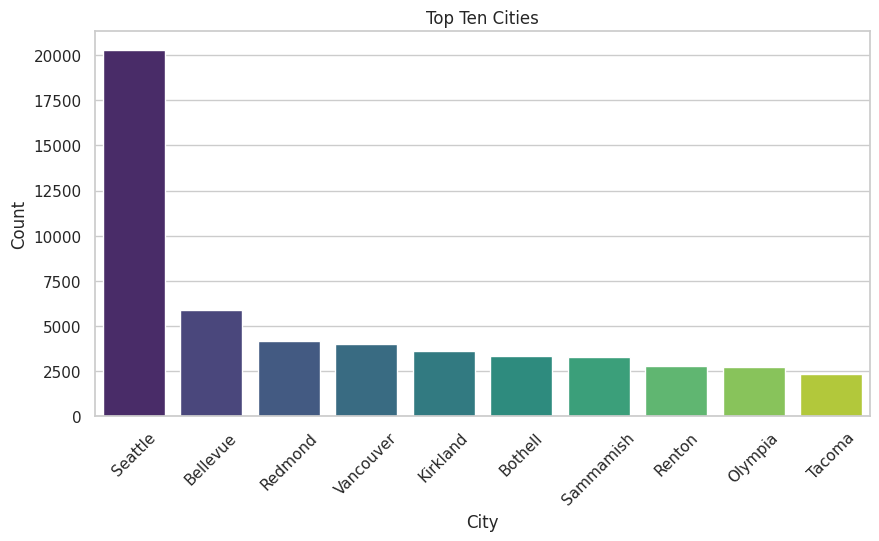

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_city.index, y=top_10_city.values, palette="viridis");
plt.title('Top Ten Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Insights**
Its retrieves the counts of occurrences for each city in the DataFrame df and selects the top 10 cities.


In [ ]:
#Distribution of Country
by_country = df.Country.value_counts()
top_10_country = by_country[:10]
top_10_country

,count
Country,
King,58980
Snohomish,12412
Pierce,8525
Clark,6681
Thurston,4109
Kitsap,3828
Whatcom,2839
Spokane,2785
Benton,1376


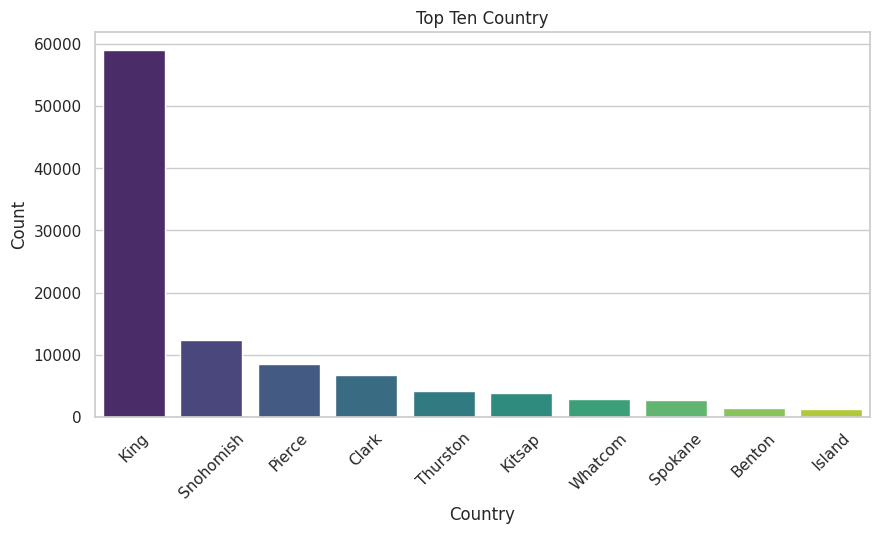

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_country.index, y=top_10_country.values,palette="viridis");
plt.title('Top Ten Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Insights**
Its retrieves the counts of occurrences for each Country in the DataFrame df and selects the top 10 Country and King has Highest country count among Distribution of  Country

# **Bivariate Analysis**

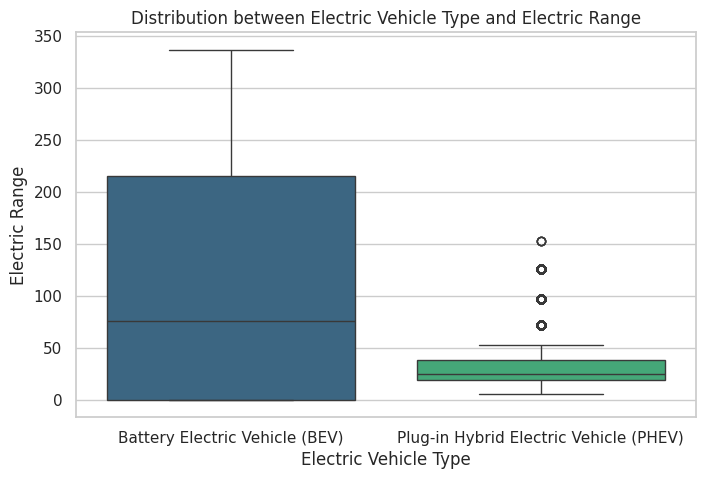

In [ ]:
#Relationship between numerical and categorical column
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.boxplot(x="Electric Vehicle Type", y="Electric Range" , data = df,palette="viridis")
plt.title('Distribution between Electric Vehicle Type and Electric Range')
plt.show()

## Insights
Its retrieves a visual representation of the distribution of electric ranges for different electric vehicle types using boxplot

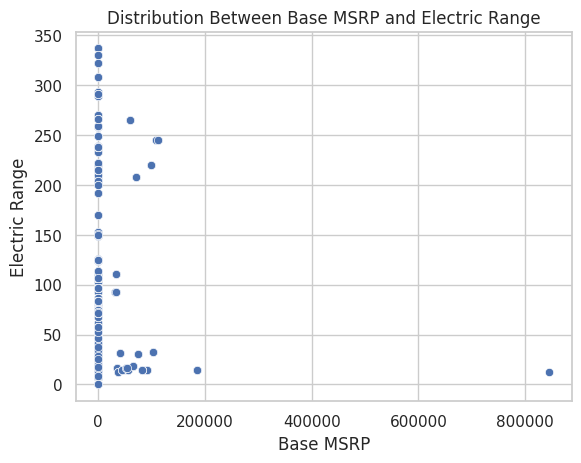

In [ ]:
#Relationship between Two  Numerical Columns
sns.set_style("whitegrid")
sns.scatterplot(x="Base MSRP", y="Electric Range" , data = df)
plt.title("Distribution Between Base MSRP and Electric Range")
plt.show()

## Distribution Between Clean Alternative Fuel Vehicle (CAFV) Eligibility and Electric Vehicle Type

<Figure size 1500x900 with 0 Axes>

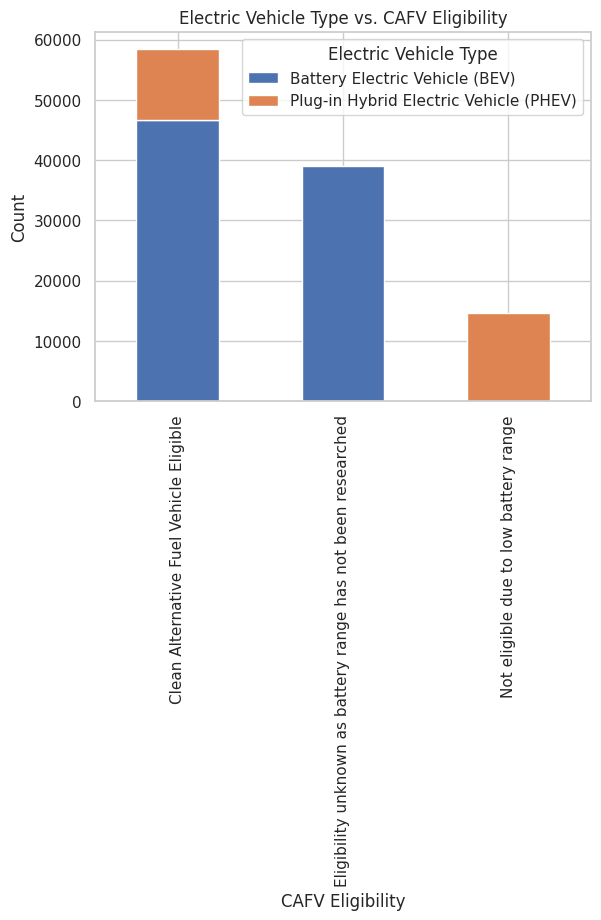

In [ ]:
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
pd.crosstab(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], df['Electric Vehicle Type']).plot(kind='bar', stacked=True)
plt.title('Electric Vehicle Type vs. CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

## **Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location**

In [ ]:
!pip install plotly

In [ ]:
df_grouped = df.groupby(['State']).agg(vehicle_count=('VIN (1-10)', 'count')).reset_index()

In [39]:
#Displaying State which has Highest Number of vehicle count
fig = px.choropleth(
    df_grouped,
    locations='State',
    locationmode='USA-states',
    color='vehicle_count',
    color_continuous_scale=px.colors.sequential.Tealgrn_r,
    scope='usa',
    labels={'vehicle_count': 'Number of Vehicles'},
    hover_name='State',
    hover_data={'vehicle_count': True},
)
fig.update_layout(title_text='Number of Vehicles')
fig.show()

In [ ]:
df_group = df.groupby(['State','City']).agg(Number_of_Vehicles=('VIN (1-10)', 'count')).reset_index()

In [ ]:
#Animation of  Vehicle Count based on State
fig = px.choropleth(
    df_group,
    locations='State',
    locationmode='USA-states',
    color='Number_of_Vehicles',
    color_continuous_scale=px.colors.sequential.Viridis_r,
    scope='usa',
    labels={'Number_of_Vehicles': 'State'},
    hover_name='State',
    hover_data={'Number_of_Vehicles': True},
    animation_frame='State'

)
fig.update_layout(title_text='Number of Vehicles')
fig.show()

# **Task 3-Create a Racing Bar Plot to display the animation of EV Make and its count each year.**

In [ ]:
!pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
ev_Model = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0).cumsum()
print(ev_Model)

Make        AUDI  AZURE DYNAMICS  BENTLEY   BMW  CADILLAC  CHEVROLET  \
Model Year                                                             
1997           0               0        0     0         0          1   
1998           0               0        0     0         0          1   
1999           0               0        0     0         0          1   
2000           0               0        0     0         0          1   
2002           0               0        0     0         0          1   
2008           0               0        0     0         0          1   
2010           0               0        0     0         0          1   
2011           0               4        0     0         0         72   
2012           0               7        0     0         0        568   
2013           0               7        0     0         0       1386   
2014           0               7        0   457        58       2110   
2015           0               7        0   860        58       

In [ ]:
import bar_chart_race as bcr
bcr.bar_chart_race(df=
 ev_Model,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=15,
    period_length=1000,
    interpolate_period=False,
    label_bars=True,
    bar_size=.90,
    period_label={'x': .95, 'y': .25, 'ha': 'right','fontsize':12},
    period_summary_func=lambda v, r: {'x': .98, 'y': .2,'s': f'EV Makes: {v.sum():,.0f}','ha': 'right', 'size': 11},
    perpendicular_bar_func='median',
    figsize=(6, 4),
    dpi=144,
    cmap='Accent',
    bar_label_size=7,
    tick_label_size=5,
    shared_fontdict={'color' : '.1'},
    scale='linear',
    title='Racing Bar Chart of EV Makes and its Count Each Year',
    title_size=15
)